## AS4_Sentiment Analysis

Richard Yang

- Create classification model, predicting the outcome of food safety inspection based on the inspectors’ comments
- Leverage the results of your homework from Week-1 and Week-2 to extract free-form text comments from inspectors
- Discard the text from “Health Code” – only keep inspectors’ comments
- Build classification model, predicting the outcome of inspection – your target variable is “Results”
- Explain why you selected a particular text pre-processing technique
- Visualize results of at least two text classifiers and select the most robust one
- You can choose to build a binary classifier (limiting your data to Pass / Fail) or multinomial classifier with all available values in Results

## Data Preparation

In [2]:
# Read the data

import pandas as pd
import regex as re
import collections
df_raw = pd.read_csv('Food_Inspections.csv')
df_raw.head(5)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2563767,CERES' TABLE,CERES' TABLE,2137239.0,Restaurant,Risk 1 (High),3124 N BROADWAY,CHICAGO,IL,60657.0,09/15/2022,Non-Inspection,No Entry,NaN,41.938412,-87.644492,"(41.93841197166044, -87.64449180403412)"
1,2563480,FINKI ELEMENTARY ACADEMY,FINKI ELEMENTARY ACADEMY,23541.0,School,Risk 1 (High),2332 S Western (2400W),CHICAGO,IL,60608.0,09/12/2022,Canvass,Pass,NaN,NaN,NaN,NaN
2,2563279,SH GRILL,SH GRILL,2863054.0,Catering,Risk 1 (High),167 N GREEN ST,CHICAGO,IL,60607.0,09/06/2022,License,Pass,NaN,41.885044,-87.648476,"(41.88504417665877, -87.64847590715003)"
3,2562053,SUBWAY,SUBWAY,2863267.0,Restaurant,Risk 1 (High),4351 W ARMITAGE AVE,CHICAGO,IL,60639.0,08/12/2022,License,Pass,NaN,41.916939,-87.735947,"(41.9169392924408, -87.73594733406117)"
4,2560592,PROVARE CHICAGO,PROVARE CHICAGO,2796734.0,Restaurant,Risk 1 (High),1421 W CHICAGO AVE,CHICAGO,IL,60642.0,07/12/2022,Canvass,Pass,NaN,41.896025,-87.663272,"(41.89602502708334, -87.66327229348566)"


In [3]:
df_raw.shape


(251211, 17)

In [4]:
# Clean the data, making sure that there are no NaNs in "Violations" column
df = df_raw.copy()
# filter only 'Pass' and 'Fail' rows in 'Results' column

df = df[df['Results'].isin(['Pass', 'Fail'])]
df['Results'].value_counts()

Pass    129441
Fail     48794
Name: Results, dtype: int64

In [5]:
df.dropna(subset=['Violations'], inplace=True)

print(df['Violations'].iloc[0])

3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING - Comments: 2-102.14(O) OBSERVED NO EMPLOYEE HEALTH POLICY ON SITE. INSTRUCTED TO PROVIDE. PRIORITY FOUNDATION 7-38-010. | 5. PROCEDURES FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS - Comments: 2-501.11 OBSERVED NO WRITTEN PROCEDURE NOR ADEQUATE SUPPLIES ON SITE TO PROPERLY RESPOND TO VOMIT AND DIARRHEA EVENTS THAT CAN POTENTIALLY OCCUR INSIDE OF THE FACILITY. INSTRUCTED TO PROVIDE. PRIORITY FOUNDATION 7-38-005. | 10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: 6-301.14 OBSERVED HAND WASHING SIGNS ARE NEEDED AT ALL OF THE HAND WASHING SINKS LOCATED IN THE FOOD PREP AREA, BAR, AND IN ALL TOILET ROOMS. INSTRUCTED TO PROVIDE. | 21. PROPER HOT HOLDING TEMPERATURES - Comments: 3-501.16(A:1) OBSERVED TIME/TEMPERATURE CONTROL FOR SAFETY FOODS (RICE, DIM SUM) AT IMPROPER HOT HOLDING TEMPERATURES LOCATED INSIDE OF A HOT HOLDING UNIT; ABOUT 2 LBS OF COOKED RICE AT 106F 

Extract Violations

In [6]:
import regex as re

df['Violations'] = df['Violations'].astype(str)
df['Violations'] = '| ' + df['Violations'].astype(str) 
df['Violations_new']= df['Violations'].apply(lambda x: re.findall(r"\|\s*\d+\.\s*(.*?)\s*(?=\|\s*\d+\.\s*|-\s*Comments)", x))
df['Violations_new'].iloc[0]


['MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING',
 'PROCEDURES FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS',
 'ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE',
 'PROPER HOT HOLDING TEMPERATURES',
 'PROPER COOLING METHODS USED; ADEQUATE EQUIPMENT FOR TEMPERATURE CONTROL',
 'THERMOMETERS PROVIDED & ACCURATE',
 'FOOD PROPERLY LABELED; ORIGINAL CONTAINER',
 'INSECTS, RODENTS, & ANIMALS NOT PRESENT',
 'INSECTS, RODENTS, & ANIMALS NOT PRESENT',
 'SINGLE-USE/SINGLE-SERVICE ARTICLES: PROPERLY STORED & USED',
 'NON-FOOD/FOOD CONTACT SURFACES CLEAN',
 'PLUMBING INSTALLED; PROPER BACKFLOW DEVICES',
 'TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED',
 'GARBAGE & REFUSE PROPERLY DISPOSED; FACILITIES MAINTAINED',
 'PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN',
 'PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN',
 'PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN',
 'ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAINING',
 

Extract Comments

In [7]:
# create a new column to store the comments from the Violations column
df['Comments'] = df['Violations'].apply(lambda x: re.findall(r"Comments: (.*?)(?= \d{1,2}\.)", x))

df['Comments'].iloc[0]

['2-102.14(O) OBSERVED NO EMPLOYEE HEALTH POLICY ON SITE. INSTRUCTED TO PROVIDE. PRIORITY FOUNDATION 7-38-010. |',
 '2-501.11 OBSERVED NO WRITTEN PROCEDURE NOR ADEQUATE SUPPLIES ON SITE TO PROPERLY RESPOND TO VOMIT AND DIARRHEA EVENTS THAT CAN POTENTIALLY OCCUR INSIDE OF THE FACILITY. INSTRUCTED TO PROVIDE. PRIORITY FOUNDATION 7-38-005. |',
 '6-301.14 OBSERVED HAND WASHING SIGNS ARE NEEDED AT ALL OF THE HAND WASHING SINKS LOCATED IN THE FOOD PREP AREA, BAR, AND IN ALL TOILET ROOMS. INSTRUCTED TO PROVIDE. |',
 '3-501.16(A:1) OBSERVED TIME/TEMPERATURE CONTROL FOR SAFETY FOODS (RICE, DIM SUM) AT IMPROPER HOT HOLDING TEMPERATURES LOCATED INSIDE OF A HOT HOLDING UNIT; ABOUT 2 LBS OF COOKED RICE AT 106F AND ABOUT 2 LBS OF COOKED DIM SUM AT 106.5F. INSTRUCTED MANAGER TO DISCARD AND DENATURE SAID TCS FOODS AND ALWAYS MAINTAIN ALL HOT HOLDING TCS FOODS AT 135F OR ABOVE AT ALL TIMES. THE MANAGER DISCARDED SAID TCS FOODS DURING THE INSPECTION. PRIORITY VIOLATION. CITATION ISSUED 7-38-005. |',
 '4

Discard the code before comments

In [8]:
# Create a new column 'Updated_Comments' in the 'df' DataFrame
df['Updated_Comments'] = ""

# Loop through the rows of the 'df' DataFrame
for index, row in df.iterrows():
    comments = row['Comments']  # Get the 'Comments' column value for the current row
    updated_comments = []
    for comment in comments:
        words = comment.split()  # Split the string by whitespace
        for word in words:
            if re.match(r'^[A-Za-z]+$', word):  # Check if the word is an English word
                updated_comments.append(comment[comment.index(word):])  # Remove everything before the English word and append to 'updated_comments' list
                break  # Exit the loop after finding the first English word
    df.at[index, 'Updated_Comments'] = updated_comments  # Store the 'updated_comments' list in 'Updated_Comments' column

In [9]:
df['Updated_Comments'].iloc[0]

['OBSERVED NO EMPLOYEE HEALTH POLICY ON SITE. INSTRUCTED TO PROVIDE. PRIORITY FOUNDATION 7-38-010. |',
 'OBSERVED NO WRITTEN PROCEDURE NOR ADEQUATE SUPPLIES ON SITE TO PROPERLY RESPOND TO VOMIT AND DIARRHEA EVENTS THAT CAN POTENTIALLY OCCUR INSIDE OF THE FACILITY. INSTRUCTED TO PROVIDE. PRIORITY FOUNDATION 7-38-005. |',
 'OBSERVED HAND WASHING SIGNS ARE NEEDED AT ALL OF THE HAND WASHING SINKS LOCATED IN THE FOOD PREP AREA, BAR, AND IN ALL TOILET ROOMS. INSTRUCTED TO PROVIDE. |',
 'OBSERVED TIME/TEMPERATURE CONTROL FOR SAFETY FOODS (RICE, DIM SUM) AT IMPROPER HOT HOLDING TEMPERATURES LOCATED INSIDE OF A HOT HOLDING UNIT; ABOUT 2 LBS OF COOKED RICE AT 106F AND ABOUT 2 LBS OF COOKED DIM SUM AT 106.5F. INSTRUCTED MANAGER TO DISCARD AND DENATURE SAID TCS FOODS AND ALWAYS MAINTAIN ALL HOT HOLDING TCS FOODS AT 135F OR ABOVE AT ALL TIMES. THE MANAGER DISCARDED SAID TCS FOODS DURING THE INSPECTION. PRIORITY VIOLATION. CITATION ISSUED 7-38-005. |',
 'OBSERVED A HOT HOLDING UNIT (WITH TCS FOODS I

In [10]:
# Drop rows with empty arrays in 'Comments' column
df = df[df['Updated_Comments'].map(lambda x: len(x) > 0)]

In [11]:
# Drop na values in 'Result' column
df.dropna(subset=['Results'], inplace=True)
df.shape

(123078, 20)

In [12]:
# Build classification model, predicting the outcome of inspection – your target variable is “Results”

df['Results'].value_counts()

Pass    79415
Fail    43663
Name: Results, dtype: int64

In [13]:
# convert label to a binary numerical variable

df['Results1'] = df['Results'].map({'Pass': 1, 'Fail': 0})
df['Results1'].value_counts()

1    79415
0    43663
Name: Results1, dtype: int64

In [14]:
import nltk
def remove_stopwords(words):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    # Remove single-character tokens (mostly punctuation)
    words = [word for word in words if len(word) > 1]
    # Remove numbers
    words = [word for word in words if not word.isnumeric()]
    # Remove punctuation
    words = [word for word in words if word.isalpha()]
    # Lowercase all words (default_stopwords are lowercase too)
    words = [word.lower() for word in words]
    # Remove stopwords
    words = [word for word in words if word not in stopwords]
    return words

def clean_text(text):
    tokens = nltk.word_tokenize(text)
    clean_text = remove_stopwords(tokens)
    return clean_text

def lemma(words):
    lemmatizer = nltk.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return words

In [15]:

# to string
df['Updated_Comments_new'] = df['Updated_Comments'].astype(str)
df['Updated_Comments2'] = df['Updated_Comments_new'].apply(clean_text)

In [16]:
df['Updated_Comments3'] = df['Updated_Comments2'].apply(lemma)

In [17]:
df['Updated_Comments'].iloc[0]

['OBSERVED NO EMPLOYEE HEALTH POLICY ON SITE. INSTRUCTED TO PROVIDE. PRIORITY FOUNDATION 7-38-010. |',
 'OBSERVED NO WRITTEN PROCEDURE NOR ADEQUATE SUPPLIES ON SITE TO PROPERLY RESPOND TO VOMIT AND DIARRHEA EVENTS THAT CAN POTENTIALLY OCCUR INSIDE OF THE FACILITY. INSTRUCTED TO PROVIDE. PRIORITY FOUNDATION 7-38-005. |',
 'OBSERVED HAND WASHING SIGNS ARE NEEDED AT ALL OF THE HAND WASHING SINKS LOCATED IN THE FOOD PREP AREA, BAR, AND IN ALL TOILET ROOMS. INSTRUCTED TO PROVIDE. |',
 'OBSERVED TIME/TEMPERATURE CONTROL FOR SAFETY FOODS (RICE, DIM SUM) AT IMPROPER HOT HOLDING TEMPERATURES LOCATED INSIDE OF A HOT HOLDING UNIT; ABOUT 2 LBS OF COOKED RICE AT 106F AND ABOUT 2 LBS OF COOKED DIM SUM AT 106.5F. INSTRUCTED MANAGER TO DISCARD AND DENATURE SAID TCS FOODS AND ALWAYS MAINTAIN ALL HOT HOLDING TCS FOODS AT 135F OR ABOVE AT ALL TIMES. THE MANAGER DISCARDED SAID TCS FOODS DURING THE INSPECTION. PRIORITY VIOLATION. CITATION ISSUED 7-38-005. |',
 'OBSERVED A HOT HOLDING UNIT (WITH TCS FOODS I

In [18]:
# # Convert list entries to strings
# df['Updated_Comments'] = df['Updated_Comments'].apply(', '.join)

In [19]:
import sklearn
import pandas as pd

import wordcloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import metrics

In [20]:
# Split the data into training and testing sets

X = df['Updated_Comments3']
y = df['Results1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:

print(f"Training records, X_train: {X_train.shape} y_train: {y_train.shape}")
print(f"Testing records, X_test: {X_test.shape} y_test: {y_test.shape}")

Training records, X_train: (86154,) y_train: (86154,)
Testing records, X_test: (36924,) y_test: (36924,)


In [22]:
X_train


167000    [cooler, paint, shall, prep, table, lower, she...
169000    [front, customer, display, cooler, ice, buildu...
87386     [ice, box, stored, item, fan, housing, maintai...
92937     [rusty, food, storage, shelving, rear, food, s...
159685    [clean, sanitize, interior, panel, ice, machin...
                                ...                        
15766     [food, debris, cooking, equipment, prep, table...
163627    [individual, packaged, sell, inside, cooler, l...
180638          [bulb, ceiling, ice, maker, must, shielded]
181036    [licensed, pest, control, logbook, proof, serv...
113206    [broken, floor, tile, front, bar, bar, door, f...
Name: Updated_Comments3, Length: 86154, dtype: object

In [23]:
# Convert elements in X_train and X_test to strings
X_train = [str(doc) for doc in X_train]
X_test = [str(doc) for doc in X_test]


## CountVectorizer for Naive Bayes, Logistic Regression, and Support Vector Machine

In [34]:
# Hyperparameter tuning for CountVectorizer

# Create CountVectorizer object
countvectorizer = CountVectorizer()

# using gridsearch to tune parameters for ngram_range in countvectorizer

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search

param_grid = {'max_df': [0.8, 0.9],
                'min_df': [0.2, 0.3],
                'max_features': [1000, 1500],
                'ngram_range': [(1, 1), (1, 2), (1, 3)]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = countvectorizer, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\Richa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3,
             estimator=CountVectorizer(max_df=0.8, max_features=1000,
                                       min_df=0.2, ngram_range=(1, 3)),
             n_jobs=-1,
             param_grid={'max_df': [0.8, 0.9], 'max_features': [1000, 1500],
                         'min_df': [0.2, 0.3],
                         'ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring='roc_auc', verbose=2)

In [35]:
# best parameters
grid_search.best_params_

{'max_df': 0.8, 'max_features': 1000, 'min_df': 0.2, 'ngram_range': (1, 1)}

In [24]:
# fit the model with best parameters

countvectorizer = CountVectorizer(max_df=0.8, min_df=0.2, max_features=1000, ngram_range=(1,1))

# Fit the CountVectorizer to the training data
X_train_dtm = countvectorizer.fit_transform(X_train)

# Transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = countvectorizer.transform(X_test)

### Naive Bayes

In [26]:
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

# train and time the model using X_train_dtm
mod_nb_cv = nb.fit(X_train_dtm, y_train)

# make class predictions for X_test_dtm
y_pred_class_nb_cv = mod_nb_cv.predict(X_test_dtm)

# calculate accuracy of class predictions
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_class_nb_cv) * 100:.1f}%")

# calculate precision and recall
print(f"Classification Report:\n {classification_report(y_test, y_pred_class_nb_cv)}")

# calculate the confusion matrix
print(f"Confusion Matrix: \n {metrics.confusion_matrix(y_test, y_pred_class_nb_cv)}")

Test Accuracy: 81.9%
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.70      0.74     13213
           1       0.84      0.88      0.86     23711

    accuracy                           0.82     36924
   macro avg       0.81      0.79      0.80     36924
weighted avg       0.82      0.82      0.82     36924

Confusion Matrix: 
 [[ 9303  3910]
 [ 2780 20931]]


In [29]:
# Most important features

coefs_with_fns = list(zip(mod_nb_cv.feature_log_prob_[0], countvectorizer.get_feature_names_out()))

coefs_with_fns_df = pd.DataFrame(coefs_with_fns,
                    columns=['feature', 'coefficient'])

coefs_with_fns_df.sort_values(by='coefficient', ascending=False, inplace=True)
coefs_with_fns_df.head(10)

,feature,coefficient
31,-3.783313,water
30,-3.447783,wall
29,-3.299113,violation
28,-4.584954,tile
27,-4.539393,surface
26,-3.483221,storage
25,-4.648801,smooth
24,-2.976923,sink
23,-3.989175,room
22,-4.129973,replace


### Logistic Regression Model

In [30]:
# instantiate a logistic regression model
logreg = LogisticRegression(max_iter=10000)

# train the model using X_train_dtm
mod_lr_cv = logreg.fit(X_train_dtm, y_train)

# make class predictions for X_test_dtm
y_pred_class_lr_cv = logreg.predict(X_test_dtm)

# calculate accuracy of class predictions
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_class_lr_cv) * 100:.1f}%")

# calculate precision and recall
print(f"Classification Report:\n {classification_report(y_test, y_pred_class_lr_cv)}")

# calculate the confusion matrix
print(f"Confusion Matrix: \n {metrics.confusion_matrix(y_test, y_pred_class_lr_cv)}")

Test Accuracy: 87.8%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81     13213
           1       0.87      0.95      0.91     23711

    accuracy                           0.88     36924
   macro avg       0.88      0.85      0.86     36924
weighted avg       0.88      0.88      0.88     36924

Confusion Matrix: 
 [[ 9821  3392]
 [ 1095 22616]]


In [32]:
clf = mod_lr_cv

feature_names = countvectorizer.get_feature_names_out()
coefs_with_fns = zip(feature_names, clf.coef_[0])

coefs_with_fns_df = pd.DataFrame(coefs_with_fns,
                    columns=['feature', 'coefficient'])

coefs_with_fns_df.sort_values(by='coefficient', ascending=True, inplace=True)
coefs_with_fns_df.head(10)


,feature,coefficient
29,violation,-2.718344
31,water,-0.623307
18,provide,-0.525567
5,door,-0.484766
14,machine,-0.336135
8,food,-0.235253
0,area,-0.221191
30,wall,-0.162778
24,sink,-0.123756
20,remove,-0.119390


### Support Vector Machine

In [33]:
# instantiate a SVM model
svm = SGDClassifier(max_iter=100, tol=None)

# train the model using X_train_dtm
mod_svm_cv=svm.fit(X_train_dtm, y_train)

# make class predictions for X_test_dtm
y_pred_class_svm_cv = svm.predict(X_test_dtm)

# calculate accuracy of class predictions
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_class_svm_cv) * 100:.1f}%")

# calculate precision and recall
print(f"Classification Report:\n {classification_report(y_test, y_pred_class_svm_cv)}")

# calculate the confusion matrix
print(f"Confusion Matrix: \n {metrics.confusion_matrix(y_test, y_pred_class_svm_cv)}")

Test Accuracy: 87.5%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.70      0.80     13213
           1       0.85      0.97      0.91     23711

    accuracy                           0.87     36924
   macro avg       0.89      0.84      0.85     36924
weighted avg       0.88      0.87      0.87     36924

Confusion Matrix: 
 [[ 9283  3930]
 [  693 23018]]


In [34]:
clf = mod_svm_cv

feature_names = countvectorizer.get_feature_names_out()
coefs_with_fns = zip(feature_names, clf.coef_[0])

coefs_with_fns_df = pd.DataFrame(coefs_with_fns,
                    columns=['feature', 'coefficient'])

coefs_with_fns_df.sort_values(by='coefficient', ascending=True, inplace=True)
coefs_with_fns_df.head(10)

,feature,coefficient
29,violation,-2.200455
18,provide,-0.343531
31,water,-0.340049
5,door,-0.251845
14,machine,-0.172926
8,food,-0.120700
30,wall,-0.080080
24,sink,-0.078919
20,remove,-0.074277
0,area,-0.071956


## TF-IDF Vectorizer for Naive Bayes, Logistic Regression, and Support Vector Machine

In [52]:
# tfidfvectorizer

# instantiate the vectorizer

tfidfvectorizer = TfidfVectorizer()

# using gridsearch to tune parameters for ngram_range in countvectorizer

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search

param_grid = {'max_df': [0.8, 0.9],
                'min_df': [0.2, 0.3],
                'max_features': [1000, 1500],
                'ngram_range': [(1, 1), (1, 2), (1, 3)]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = tfidfvectorizer, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\Richa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=TfidfVectorizer(), n_jobs=-1,
             param_grid={'max_df': [0.8, 0.9], 'max_features': [1000, 1500],
                         'min_df': [0.2, 0.3],
                         'ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring='roc_auc', verbose=2)

In [54]:
# best parameters
grid_search.best_params_

{'max_df': 0.8, 'max_features': 1000, 'min_df': 0.2, 'ngram_range': (1, 1)}

In [40]:
# fit the model with best parameters

tfidfvectorizer = TfidfVectorizer(max_df=0.8, min_df=0.2, max_features=1000, ngram_range=(1,1))

# Fit the CountVectorizer to the training data
X_train_dtm = tfidfvectorizer.fit_transform(X_train)

# Transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = tfidfvectorizer.transform(X_test)

### Naive Bayes Model

In [42]:
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

# train and time the model using X_train_dtm
mod_nb_tfidf = nb.fit(X_train_dtm, y_train)

# make class predictions for X_test_dtm
y_pred_class_nb_ifidf = mod_nb_tfidf.predict(X_test_dtm)

# calculate accuracy of class predictions
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_class_nb_ifidf) * 100:.1f}%")

# calculate precision and recall
print(f"Classification Report:\n {classification_report(y_test, y_pred_class_nb_ifidf)}")

# calculate the confusion matrix
print(f"Confusion Matrix: \n {metrics.confusion_matrix(y_test, y_pred_class_nb_ifidf)}")

Test Accuracy: 76.8%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.38      0.54     13213
           1       0.74      0.98      0.84     23711

    accuracy                           0.77     36924
   macro avg       0.83      0.68      0.69     36924
weighted avg       0.81      0.77      0.74     36924

Confusion Matrix: 
 [[ 5061  8152]
 [  409 23302]]


In [44]:
# Most important features

coefs_with_fns = list(zip(mod_nb_tfidf.feature_log_prob_[0], tfidfvectorizer.get_feature_names_out()))

coefs_with_fns_df = pd.DataFrame(coefs_with_fns,
                    columns=['feature', 'coefficient'])

coefs_with_fns_df.sort_values(by='coefficient', ascending=False, inplace=True)
coefs_with_fns_df.head(10)

,feature,coefficient
31,-3.423175,water
30,-3.471033,wall
29,-2.883195,violation
28,-4.388404,tile
27,-4.351209,surface
26,-3.546840,storage
25,-4.398258,smooth
24,-3.039684,sink
23,-3.770259,room
22,-4.058402,replace


### Logistic Regression Model

In [73]:
# instantiate a logistic regression model
logreg = LogisticRegression(max_iter=10000)

# train the model using X_train_dtm
mod_lr_tfidf = logreg.fit(X_train_dtm, y_train)

# make class predictions for X_test_dtm
y_pred_class_lr_tfidf = logreg.predict(X_test_dtm)

# calculate accuracy of class predictions
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_class_lr_tfidf) * 100:.1f}%")

# calculate precision and recall
print(f"Classification Report:\n {classification_report(y_test, y_pred_class_lr_tfidf)}")

# calculate the confusion matrix
print(f"Confusion Matrix: \n {metrics.confusion_matrix(y_test, y_pred_class_lr_tfidf)}")

Test Accuracy: 86.3%
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.73      0.79     13213
           1       0.86      0.94      0.90     23711

    accuracy                           0.86     36924
   macro avg       0.86      0.83      0.84     36924
weighted avg       0.86      0.86      0.86     36924

Confusion Matrix: 
 [[ 9620  3593]
 [ 1476 22235]]


In [45]:
clf = mod_lr_tfidf

feature_names = tfidfvectorizer.get_feature_names_out()
coefs_with_fns = zip(feature_names, clf.coef_[0])

coefs_with_fns_df = pd.DataFrame(coefs_with_fns,
                    columns=['feature', 'coefficient'])

coefs_with_fns_df.sort_values(by='coefficient', ascending=True, inplace=True)
coefs_with_fns_df.head(10)


,feature,coefficient
29,violation,-2.718344
31,water,-0.623307
18,provide,-0.525567
5,door,-0.484766
14,machine,-0.336135
8,food,-0.235253
0,area,-0.221191
30,wall,-0.162778
24,sink,-0.123756
20,remove,-0.119390


### Support Vector Machine

In [46]:
# instantiate a SVM model
svm = SGDClassifier(max_iter=100, tol=None)

# train the model using X_train_dtm
mod_svm_tfidf=svm.fit(X_train_dtm, y_train)

# make class predictions for X_test_dtm
y_pred_class_svm_tfidf = svm.predict(X_test_dtm)

# calculate accuracy of class predictions
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_class_svm_tfidf) * 100:.1f}%")

# calculate precision and recall
print(f"Classification Report:\n {classification_report(y_test, y_pred_class_svm_tfidf)}")

# calculate the confusion matrix
print(f"Confusion Matrix: \n {metrics.confusion_matrix(y_test, y_pred_class_svm_tfidf)}")

Test Accuracy: 86.2%
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.68      0.78     13213
           1       0.84      0.96      0.90     23711

    accuracy                           0.86     36924
   macro avg       0.88      0.82      0.84     36924
weighted avg       0.87      0.86      0.86     36924

Confusion Matrix: 
 [[ 9008  4205]
 [  890 22821]]


In [47]:
clf = mod_svm_tfidf

feature_names = tfidfvectorizer.get_feature_names_out()
coefs_with_fns = zip(feature_names, clf.coef_[0])

coefs_with_fns_df = pd.DataFrame(coefs_with_fns,
                    columns=['feature', 'coefficient'])

coefs_with_fns_df.sort_values(by='coefficient', ascending=True, inplace=True)
coefs_with_fns_df.head(10)

,feature,coefficient
29,violation,-10.170385
31,water,-2.751133
18,provide,-2.298171
5,door,-2.269053
8,food,-2.032995
0,area,-1.753805
14,machine,-1.629916
24,sink,-1.310867
30,wall,-1.294695
12,instructed,-1.255496


In [74]:
# create a dataframe with accuracy score for each model
# countvectorizer Accuracy
ac_nb_cv = metrics.accuracy_score(y_test, y_pred_class_nb_cv)
ac_lr_cv = metrics.accuracy_score(y_test, y_pred_class_lr_cv)
ac_svm_cv = metrics.accuracy_score(y_test, y_pred_class_svm_cv)
# tfidf
ac_nb_tfidf = metrics.accuracy_score(y_test, y_pred_class_nb_ifidf)
ac_lr_tfidf = metrics.accuracy_score(y_test, y_pred_class_lr_tfidf)
ac_svm_tfidf = metrics.accuracy_score(y_test, y_pred_class_svm_tfidf)

# countvectorizer Precision

pr_nb_cv_precesion = metrics.precision_score(
    y_test, y_pred_class_nb_cv, average='weighted')

pr_lr_cv_precesion = metrics.precision_score(
    y_test, y_pred_class_lr_cv, average='weighted')

pr_svm_cv_precesion = metrics.precision_score(
    y_test, y_pred_class_svm_cv, average='weighted')

# tfidf

pr_nb_tfidf_precesion = metrics.precision_score(
    y_test, y_pred_class_nb_ifidf, average='weighted')

pr_lr_tfidf_precesion = metrics.precision_score(
    y_test, y_pred_class_lr_tfidf, average='weighted')

pr_svm_tfidf_precesion = metrics.precision_score(
    y_test, y_pred_class_svm_tfidf, average='weighted')

# countvectorizer Recall

pr_nb_cv_recall = metrics.recall_score(
    y_test, y_pred_class_nb_cv, average='weighted')

pr_lr_cv_recall = metrics.recall_score(
    y_test, y_pred_class_lr_cv, average='weighted')

pr_svm_cv_recall = metrics.recall_score(
    y_test, y_pred_class_svm_cv, average='weighted')

# tfidf


pr_nb_tfidf_recall = metrics.recall_score(
    y_test, y_pred_class_nb_ifidf, average='weighted')

pr_lr_tfidf_recall = metrics.recall_score(
    y_test, y_pred_class_lr_tfidf, average='weighted')

pr_svm_tfidf_recall = metrics.recall_score(
    y_test, y_pred_class_svm_tfidf, average='weighted')


# create a dataframe with accuracy score, precision and recall for each model

df = pd.DataFrame({'Model': ['Naive Bayes', 'Logistic Regression', 'SVM'],
                   'CountVectorizer Accuracy': [ac_nb_cv, ac_lr_cv, ac_svm_cv],
                   'CountVectorizer Precision': [pr_nb_cv_precesion, pr_lr_cv_precesion, pr_svm_cv_precesion],
                   'CountVectorizer Recall': [pr_nb_cv_recall, pr_lr_cv_recall, pr_svm_cv_recall],
                   'TfidfVectorizer Accuracy': [ac_nb_tfidf, ac_lr_tfidf, ac_svm_tfidf],
                   'TfidfVectorizer Precision': [pr_nb_tfidf_precesion, pr_lr_tfidf_precesion, pr_svm_tfidf_precesion],
                   'TfidfVectorizer Recall': [pr_nb_tfidf_recall, pr_lr_tfidf_recall, pr_svm_tfidf_recall]})
df

,Model,CountVectorizer Accuracy,CountVectorizer Precision,CountVectorizer Recall,TfidfVectorizer Accuracy,TfidfVectorizer Precision,TfidfVectorizer Recall
0,Naive Bayes,0.818817,0.816593,0.818817,0.768145,0.806814,0.768145
1,Logistic Regression,0.878480,0.880353,0.878480,0.862718,0.863067,0.862718
2,SVM,0.874797,0.881492,0.874797,0.862014,0.867910,0.862014


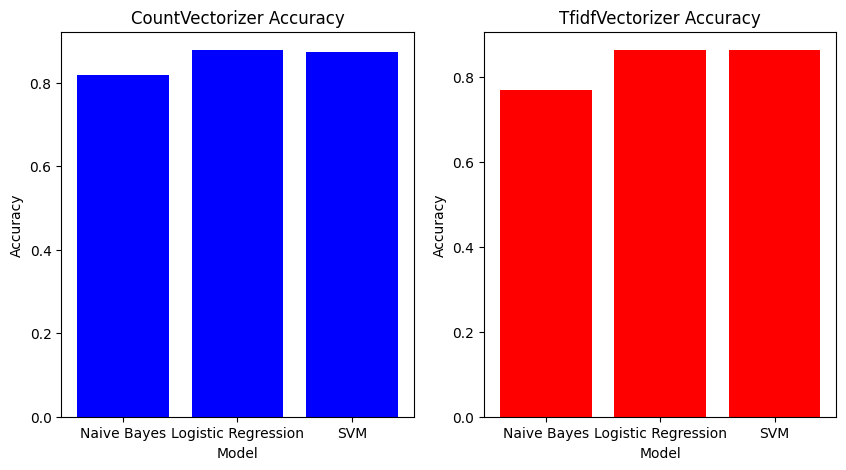

In [75]:
# plot the accuracy score for each model

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(df['Model'], df['CountVectorizer Accuracy'], color='blue')
plt.title('CountVectorizer Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.subplot(1, 2, 2)
plt.bar(df['Model'], df['TfidfVectorizer Accuracy'], color='red')
plt.title('TfidfVectorizer Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


### Conclusion

Based on the results of the three models, the Support Vector Machine model with Countvectorizer has the highest accuracy score of 0.874797. The Logistic Regression model with Countvectorizer has the highest recall score of 0.878480. Support Vector Machine model with Countvectorizer has the highest precision score of 0.881492. 

Therefore, The Support Vector Machine model with Countvectorizer is the most robust model.

However, since I limit the Max_df and Min_df to 0.8 and 0.2, and Max_features to 1000, the model may not be robust enough. If I increase the Max_df and Min_df to 1.0 and 0.0, and Max_features to 5000, the accuracy score might be even higher. However, the model may have problems such as overfitting, High Dimensionality, Noise from Rare and Common Terms, Increased Computational Resources.